# Ranking Comparison

This notebook compares the top domains in two CommonCrawl snapshots. In order to generate the host counts the following Athena query was run for each snapshot:

```sql
SELECT
  url_host_name,
  COUNT(*) AS total
FROM ccindex
WHERE crawl 'CC-MAIN-2021-04'
GROUP BY url_host_name
ORDER BY total DESC
```

Then the top 1000 hostnames were extracted to create three CSV files:

* CC-MAIN-2019-04-host-counts-1000.csv (January 2019)
* CC-MAIN-2020-05-host-counts-1000.csv (January 2020)
* CC-MAIN-2021-04-host-counts-1000.csv (January 2021)

We can load these in as three dataframes.

In [2]:
import pandas

df2019 = pandas.read_csv('../data/CC-MAIN-2019-04-host-counts-1000.csv')
df2020 = pandas.read_csv('../data/CC-MAIN-2020-05-host-counts-1000.csv')
df2021 = pandas.read_csv('../data/CC-MAIN-2021-04-host-counts-1000.csv')

And we can create a bar graph of the top 50 hosts in 2019:

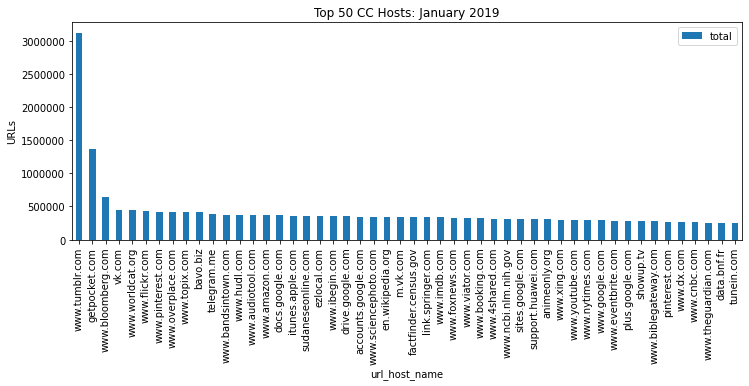

In [26]:
import matplotlib.pyplot as plt

df2019.head(50).plot.bar(
    title='Top 50 CC Hosts: January 2019',
    x='url_host_name', 
    y='total',
    ylabel='URLs',
    figsize=(12, 4)
)

plt.ticklabel_format(style='plain', axis='y')

Hmm, does plotly look any better?

In [31]:
import plotly.express as px

px.bar(
    df2019.head(50), 
    title='Top 50 CC Hosts: January 2019',
    x='url_host_name', 
    y='total',
    labels={
        'url_host_name': 'Hosts',
        'total': 'URLs'
    }
)

That's much nicer. So what about 2020 and 2021?

In [32]:
px.bar(
    df2020.head(50), 
    title='Top 50 CC Hosts: January 2020',
    x='url_host_name', 
    y='total',
    labels={
        'url_host_name': 'Hosts',
        'total': 'URLs'
    }
)

In [33]:
px.bar(
    df2021.head(50), 
    title='Top 50 CC Hosts: January 2021',
    x='url_host_name', 
    y='total',
    labels={
        'url_host_name': 'Hosts',
        'total': 'URLs'
    }
)

## Overlap

We can create sets for each set of hosts, and see what percentage of overlap there is.

In [38]:
s2019 = set(df2019['url_host_name'])
s2020 = set(df2020['url_host_name'])
s2021  =set(df2021['url_host_name'])

len(s2019.intersection(s2020)) / len(s2019)


0.19019019019019018

In [43]:
len(s2020.intersection(s2021)) / len(s2020)

0.4794794794794795

In [45]:
len(s2019.intersection(s2021)) / len(s2019)

0.2022022022022022

It looks like 2020 and 2021 were about 50% similar but 2019 and 2020 and 2019 and 2021 were only about 20% similar.

## Comparing Ranks

In [76]:
from scipy.stats import kendalltau

In [83]:
kendalltau(df2019['url_host_name'], df2020['url_host_name'])

KendalltauResult(correlation=-0.041598712941398316, pvalue=0.048980181746742776)

In [80]:
kendalltau(df2020['url_host_name'], df2021['url_host_name'])

KendalltauResult(correlation=0.0008164477102352854, pvalue=0.9691770521448666)

In [81]:
kendalltau(df2019['url_host_name'], df2021['url_host_name'])

KendalltauResult(correlation=-0.008872600054964786, pvalue=0.6745452086034623)